In [1]:
import nltk

In [2]:
#nltk.download_shell()

In [3]:
#https://archive.ics.uci.edu/ml/datasets.php

In [4]:
messages= [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
#printing the first 10 lines
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep ='\t',
                      names=['label','message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
#new column to check how long the messages are

In [14]:
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

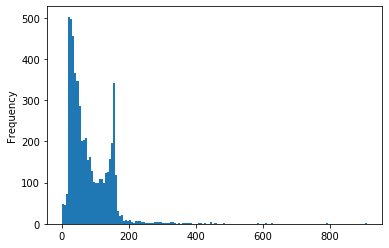

In [17]:
messages['length'].plot.hist(bins=150)

In [18]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [19]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [20]:
#to check if message length is correlated with ham or spam

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE1CCCBDA0>,
      dtype=object)

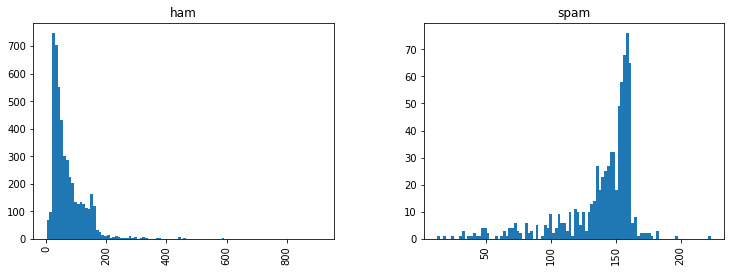

In [21]:
messages.hist(column='length',by='label',bins=100,figsize=(12,4))

In [22]:
#we can observe that average spam messages have more character(longer)
#length is a good feature to distinguish ham messages from spam messages

In [23]:
#function to split each indivitual word

In [24]:
import string

In [25]:
#remove punctuation first

In [26]:
mess = 'Sample message! Notice: it has punctuation.'

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
nonpunc =[c for c in mess if c not in string.punctuation]

In [29]:
nonpunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [30]:
from nltk.corpus import stopwords

In [31]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
nonpunc = ''.join(nonpunc)

In [33]:
nonpunc
#.join joined the words which were sperated by commas

'Sample message Notice it has punctuation'

In [34]:
nonpunc.split()
#now we have a list 

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [35]:
#remocing words which are in stopwords
clean_mess=[word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

In [36]:
clean_mess
# it and has are in stop words as they are common

['Sample', 'message', 'Notice', 'punctuation']

In [37]:
def text_process(mess):
#  1. remove punc
#  2. remove stop words
#  3. return list of clean text words

    nonpunc = [char for char in mess if char not in string.punctuation]
    
    nonpunc = ''.join(nonpunc)
    
    return [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

In [38]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [40]:
# removed words in the process which are common, i.e, removed the stop words

In [41]:
#VECTORIZATION

In [42]:
#Process
#1. count how many times a word occurs in a message (frequency)
#2. weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
#3. normalize the vectors to unil length, to abstract from the original text length(l2 norm)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [45]:
print(len(bow_transformer.vocabulary_))
#there are about this many words

11425


In [46]:
#to check meesage 4
mess4 = messages['message'][3]

In [47]:
print(mess4)

U dun say so early hor... U c already then say...


In [48]:
bow4= bow_transformer.transform([mess4])

In [49]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [50]:
print(bow4.shape)

(1, 11425)


In [51]:
# so there are about 7 unique words in message 4 after removing the stopwords
# two of those words repeat twice

In [52]:
bow_transformer.get_feature_names()[4068]

'U'

In [54]:
#bag of word count in the total message data

In [55]:
messages_bow= bow_transformer.transform(messages['message'])

In [56]:
print('Shape of Sparse matrix: ', messages_bow.shape)

Shape of Sparse matrix:  (5572, 11425)


In [58]:
messages_bow.nnz #nonzerooccurances in the maxtrix

50548

In [59]:
#term frquency inverse document frequency relationship

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
tfidf_transformer= TfidfTransformer().fit(messages_bow)

In [62]:
tfidf4= tfidf_transformer.transform(bow4)

In [63]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [64]:
#check document frequency of the word 'university' for example

In [65]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [66]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [67]:
# training time

In [68]:
from sklearn.naive_bayes import MultinomialNB  #naive bayes algo

In [69]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [71]:
#randomly checking the label of the data in the 4th row
spam_detect_model.predict(tfidf4)[0]

'ham'

In [73]:
messages['label'][3]

'ham'

In [74]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [75]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
msg_train,msg_test,label_train,label_test= train_test_split(messages['message'],
                                                           messages['label'],
                                                           test_size=0.3)

In [78]:
msg_train

655                          Did u got that persons story
2225    I prefer my free days... Tues, wed, fri oso ca...
3418               But i haf enuff space got like 4 mb...
3827    Goodmorning,my grandfather expired..so am on l...
4112    URGENT! Your Mobile number has been awarded a ...
                              ...                        
3998    Bored housewives! Chat n date now! 0871750.77....
3627          Yeah right! I'll bring my tape measure fri!
1276                                 Wot u up 2 u weirdo?
4819                                      How's ur paper?
960                                               Where @
Name: message, Length: 3900, dtype: object

In [79]:
#using sklearns built in data pipeline feature 

In [89]:
from sklearn.pipeline import Pipeline

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
pipeline=Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifer',MultinomialNB()) #multinomail is an algo, can use rdf as well
    ])

In [94]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FE19F78AE8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifer',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [95]:
predictions= pipeline.predict(msg_test)

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1440
        spam       1.00      0.70      0.82       232

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672



In [98]:
output= pd.DataFrame(predictions, columns=['label']).to_csv('predictions.csv')